#Final Project Outline
--------------------------------------------
###Basic Overview   
* Data Origins
* Feature overview
* Basic visualization to explain the data set
* Focus on most relevant data
* Fun tidbits
    
###Feature selection
* Visualizations of different features relative to price
* Normalizations, manipulations, adding features
    
###Model and Evaluation
* Test and train the model
* Adjustment of hyperparameters
* Evaluation of performance

###Something 'Extra'
* K Means - Create Clusters for a Recomendation
* Consider Tree Regressor to Identify Outliers

In [1]:
##Imports and Plot Parameters
%pylab inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 12)  
plt.rcParams['figure.dpi'] = (120)  
pd.set_option('display.max_colwidth',52)

Populating the interactive namespace from numpy and matplotlib


In [2]:
##The Raw Dataset
d_loc = '../../../Data/NYC/'
abnb = pd.read_csv(d_loc + 'nyc_airbnb_listings_full.csv')
print "DF Shape:" 
print abnb.shape

DF Shape:
(27392, 52)


In [3]:
print abnb.dtypes

id                               int64
scrape_id                        int64
last_scraped                    object
name                            object
picture_url                     object
host_id                          int64
host_name                       object
host_since                      object
host_picture_url                object
street                          object
neighbourhood                   object
neighbourhood_cleansed          object
city                            object
state                           object
zipcode                         object
market                          object
country                         object
latitude                       float64
longitude                      float64
is_location_exact               object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                     

#Data Overview:

No. | Feature Name                |Description              |
----|-----------------------------|-------------------------|
1   | name                        | Listing name                  
2   | host_name                   | Name of host    
3   | host_since                  | Date host joined AirBnB      
4   | neighbourhood_cleansed      | Neighborhood location of listing (e.g East Village)     
5   | zipcode                     | Zipcode of listing    
6   | latitude                    | Lattitude of listing    
7   | longitude                   | Longitude of listing    
8   | property_type               | Property type (e.g. Apt, house, *boat*) 
9   | room_type                   | Room type (e.g. private, shared)
10  | accommodates                | Number of individuals that can stay at the listing      
11  | bathrooms                   | Number of bathrooms for the listing    
12  | bedrooms                    | Number of bedrooms for the listing    
13  | beds                        | Number of beds for the listing    
14  | bed_type                    | Type of bed     
15  | square_feet                 | Square footage of listing     
16  | price                       | Price per night of staying    
17  | guests_included             | Number of people included in the price      
18  | extra_people                | Price bump for additional people    
19  | minimum_nights              | Minimum nights for booking      
20  | maximum_nights              | Maximum nights for booking      
21  | number_of_reviews           | Number of reviews for the listing      
22  | first_review                | Date of first review     
23  | last_review                 | Date of last review     
24  | review_scores_rating        | 1 to 100 overall listing rating    
25  | review_scores_accuracy      | 1 to 10 score for listing accuracy  
26  | review_scores_cleanliness   | 1 to 10 score for listing cleanliness     
27  | review_scores_checkin       | 1 to 10 score for checkin ease     
28  | review_scores_communication | 1 to 10 score for listing communication between host and tourist   
29  | review_scores_location      | 1 to 10 score for listing location   
30  | review_scores_value         | 1 to 10 score for listing value   
31  | host_listing_count          | Total number of listings for this host    

##Target: Listing Price
1. Preliminary Exploration
2. Normalize for number of individuals included in listing price and create log price because of long-tail distribution shape
3. Visualize to better understand the target

Figure(1800x1440)


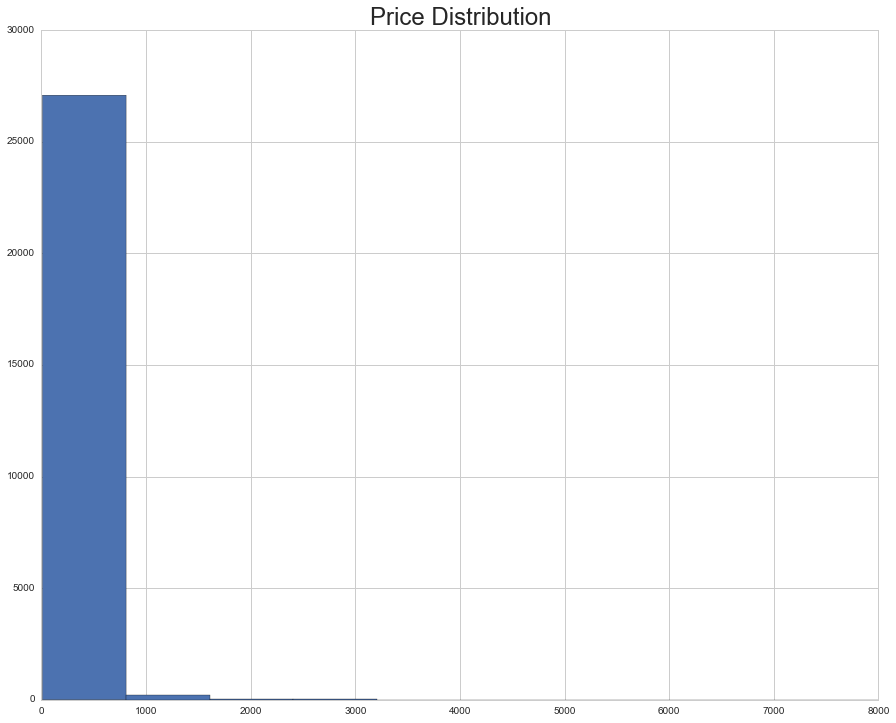

In [5]:
##Step 1: Preliminary Exploration
n_bins = 10
fig = plt.figure()
plt.title('Price Distribution', fontsize = 24)

abnb['price'].hist(bins=n_bins)
print fig

In [6]:
abnb.price.describe()

count    27392.000000
mean       171.256900
std        224.690732
min         10.000000
25%         85.000000
50%        130.000000
75%        199.000000
max       8000.000000
Name: price, dtype: float64

In [7]:
## Setp 2: Normalize for number of individuals included in listing price 
## and create log price because of long-tail distribution shape

# Fixing zero values, absent clear rule on this, assume this means 1 person
abnb[abnb.guests_included == 0] = 1 
# Adjusting price to account for guests included in listing price
abnb['price_adj'] = abnb['price']/abnb['guests_included'] 
# Tag log of normalized price, as the price is long-tailed
abnb['log_price_adj'] = np.log(abnb.price_adj)
# Describe the normalized price 
abnb.price_adj.describe()

count    27392.000000
mean       136.346919
std        215.744979
min          1.000000
25%         63.333333
50%         95.000000
75%        150.000000
max       8000.000000
Name: price_adj, dtype: float64

Figure(1800x1440)


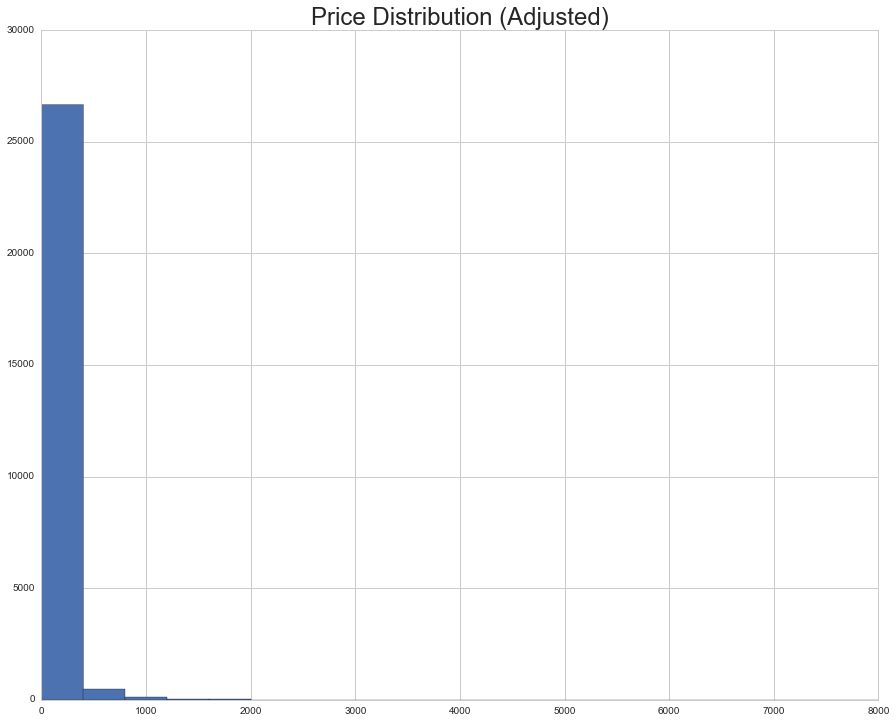

In [11]:
##Look at adjusted price
n_bins = 20

fig = plt.figure()
plt.title('Price Distribution (Adjusted)', fontsize = 24)
abnb['price_adj'].hist(bins=n_bins)

print fig

In [12]:
abnb.log_price_adj.describe()

count    27392.000000
mean         4.555187
std          0.886208
min          0.000000
25%          4.148412
50%          4.553877
75%          5.010635
max          8.987197
Name: log_price_adj, dtype: float64

Figure(1800x1440)


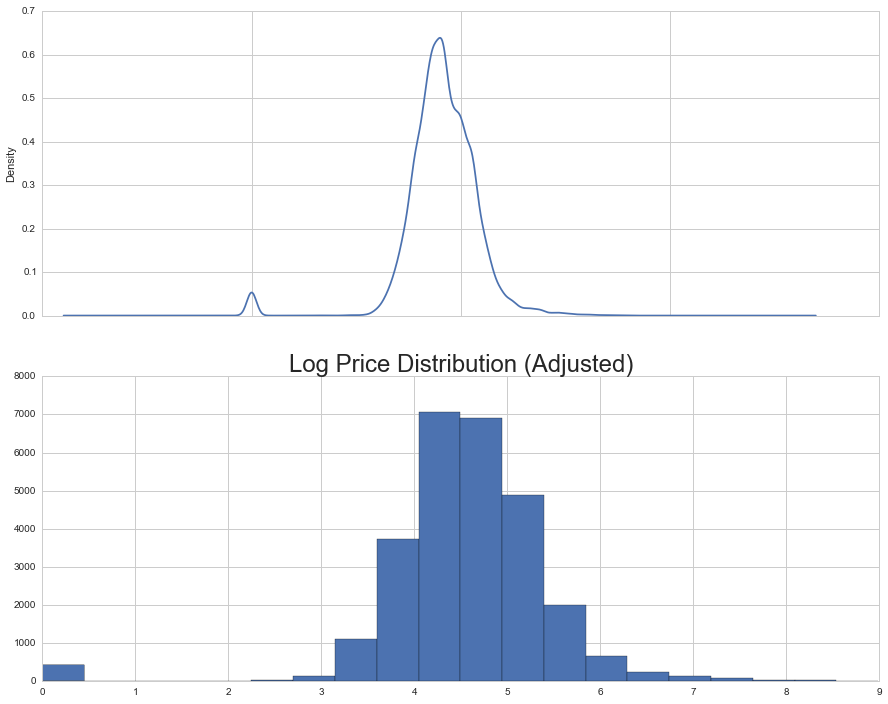

In [8]:
##Look at adjusted log price (does it look normalish?
n_bins = 20
fig, axes = plt.subplots(nrows=2, ncols=1,)

plt.title('Log Price Distribution (Adjusted)', fontsize = 24)

abnb['log_price_adj'].plot(ax=axes[0], kind='kde')
abnb['log_price_adj'].hist(ax=axes[1], bins=n_bins)

print fig

In [13]:
prop_price_grp = abnb.groupby('property_type').price_adj.mean()

prop_price_grp.reset_index()

prop_price_grp.sort('price', ascending=False)

prop_price_grp

property_type
Boat               733.106061
Other              274.810284
Loft               172.338700
Apartment          138.878480
Tent               129.333333
House              117.998386
Hut                100.000000
Bed & Breakfast     98.281936
Cabin               97.500000
Treehouse           91.833333
Chalet              89.000000
Villa               86.250000
Lighthouse          80.000000
Cave                70.000000
Camper/RV           54.000000
Dorm                51.908163
Castle              50.000000
Earth House          4.666667
1                    1.000000
Name: price_adj, dtype: float64

In [14]:
##Map property type and room type
abnb['room_map'] = abnb.room_type.map({'Entire home/apt':0,'Private room':1, 'Shared room':2})
# Categories here based on looking at average price by type.  0's all had higher than average price,
abnb['prop_map'] = abnb.property_type.map({'Loft':0,
                                           'Other':0, 
                                           'Boat':0,
                                           'Apartment':1,          
                                           'House':2,
                                           'Cabin':2,                  
                                           'Tent':2,
                                           'Lighthouse':2,    
                                           'Bed & Breakfast':2,      
                                           'Dorm':2,                  
                                           'Treehouse':2,              
                                           'Villa':2,                                                                
                                           'Camper/RV':2,                                                                  
                                           'Earth House':2,            
                                           'Chalet':2,                 
                                           'Cave':2,                   
                                           'Castle':2,                 
                                           'Hut':2})
print "Room Types Mapped:"
print abnb.room_map.value_counts() 
print "Property Types Mapped:"
print abnb.prop_map.value_counts()

Room Types Mapped:
0    15760
1    10404
2      809
dtype: int64
Property Types Mapped:
1    24519
2     1795
0      654
dtype: int64


-----------------------
## Notes to Do:
1. Cleaning and Transformation:
    * normalizaing price: per person
    * lister [gender](https://www.mashape.com/montanaflynn/gender-guesser) or [this](https://store.genderize.io/)
    * [borough](https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm)
2. Visualization:
    * whacky apt listings (boats!)
    * concise, clear
    * decision tree and confusion matrix

In [16]:
import bs4
import requests

url = requests.get('https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm')
soup = bs4.BeautifulSoup(url.text)

table = soup.find('table')
rows = table.find_all('tr')       

In [17]:
data_set = []
a, b, c = None, None, None ## Set deafault as none, to be overrideen in cases where the header 
for row in rows:
    cols = row.find_all('td')
    for td in cols:
        if td['headers'] == ['header1']:
            a = td.text
        if td['headers'] == ['header2']:
            b = td.text
        if td['headers'] == ['header3']:
            c = td.text
    data_set.append([a, b, c])

In [18]:
data_set

[[None, None, None],
 [u'Bronx', u' Central Bronx', u' 10453, 10457, 10460'],
 [u'Bronx', u' Bronx Park and Fordham', u' 10458, 10467, 10468'],
 [u'Bronx', u' High Bridge and Morrisania', u' 10451, 10452, 10456'],
 [u'Bronx', u' Hunts Point and Mott Haven', u' 10454, 10455, 10459, 10474'],
 [u'Bronx', u' Kingsbridge and Riverdale', u' 10463, 10471'],
 [u'Bronx', u' Northeast Bronx', u' 10466, 10469, 10470, 10475'],
 [u'Bronx', u' Southeast Bronx', u' 10461, 10462,10464, 10465, 10472, 10473'],
 [u'Brooklyn', u' Central Brooklyn', u' 11212, 11213, 11216, 11233, 11238'],
 [u'Brooklyn', u' Southwest Brooklyn', u' 11209, 11214, 11228'],
 [u'Brooklyn', u' Borough Park', u' 11204, 11218, 11219, 11230'],
 [u'Brooklyn', u' Canarsie and Flatlands', u' 11234, 11236, 11239'],
 [u'Brooklyn', u' Southern Brooklyn', u' 11223, 11224, 11229, 11235'],
 [u'Brooklyn', u' Northwest Brooklyn', u' 11201, 11205, 11215, 11217, 11231'],
 [u'Brooklyn', u' Flatbush', u' 11203, 11210, 11225, 11226'],
 [u'Brooklyn'

In [20]:
data_set[1][2].split(',')

[u' 10453', u' 10457', u' 10460']

In [46]:
data = data_set[1:]

In [71]:
zips = []
for row in data:
    zipr = row[2].split(',')
    zips += zipr
zips.sort()
zip_map = pd.DataFrame(zips)

In [80]:
data = pd.DataFrame(data_set[1:])
data

,0,1,2
0,Bronx,Central Bronx,"10453, 10457, 10460"
1,Bronx,Bronx Park and Fordham,"10458, 10467, 10468"
2,Bronx,High Bridge and Morrisania,"10451, 10452, 10456"
3,Bronx,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,Bronx,Kingsbridge and Riverdale,"10463, 10471"
5,Bronx,Northeast Bronx,"10466, 10469, 10470, 10475"
6,Bronx,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
7,Brooklyn,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
8,Brooklyn,Southwest Brooklyn,"11209, 11214, 11228"
9,Brooklyn,Borough Park,"11204, 11218, 11219, 11230"


In [72]:
zip_map

,0
0,10001
1,10002
2,10003
3,10004
4,10005
5,10006
6,10007
7,10009
8,10010
9,10011


In [83]:
zip_map['Boro'] = None
zip_map['Neighborhood'] = None

for i in data[2]:
    for z in i.split(','):
        if int(z) in zip_map[0]:
            zip_map['Boro'] += data[i][0]
            zip_map['Neighborhood'] += data[i][1]
zip_map

,0,Boro,Neighborhood
0,10001,None,None
1,10002,None,None
2,10003,None,None
3,10004,None,None
4,10005,None,None
5,10006,None,None
6,10007,None,None
7,10009,None,None
8,10010,None,None
9,10011,None,None


In [67]:
test = [[1, 2, 3, 4, 5, 5, 5],[3, 3, 3,]]
test_1 = [2, 4, 5, 6, 7,]

test_2 = []
for row in test:
    for i in row:
        if i in test_1:
            test_2 += str(i)

test_2

['2', '4', '5', '5', '5']